In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emineyetm/fake-news-detection-datasets")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fake-news-detection-datasets


In [2]:
# /kaggle/input/fake-news-detection-datasets

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
#Creating the dataframes for true and fake
dfT = pd.read_csv('/kaggle/input/fake-news-detection-datasets/News _dataset/True.csv')
dfF = pd.read_csv('/kaggle/input/fake-news-detection-datasets/News _dataset/Fake.csv')

In [5]:
dfT["Label"]=1;
dfF["Label"]=0;

In [6]:
df = pd.concat([dfT,dfF],ignore_index=True)

In [7]:
df.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
df.isnull().sum()

,0
title,0
text,0
subject,0
date,0
Label,0


In [9]:
df.drop(["date"], axis=1, inplace=True)

In [10]:
x=df.iloc[:,:3]
y=df["Label"]
x.head()

,title,text,subject
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews


In [11]:
x["subject"].value_counts()

,count
subject,
politicsNews,11272
worldnews,10145
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


In [12]:
dummy_subjects = pd.get_dummies(x["subject"],prefix="subject")
x=pd.concat([x,dummy_subjects],axis=1)
x.drop("subject",axis=1,inplace=True)

In [13]:
x.head()

,title,text,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,False,False,False,False,False,False,True,False
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,False,False,False,False,False,False,True,False
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,False,False,False,False,False,False,True,False
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,False,False,False,False,False,False,True,False
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,False,False,False,False,False,False,True,False


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)  # optional: adjust max_features
X_text = tfidf.fit_transform(x['text'])  # First call — unused

combined = x["title"]+" - "+x["text"]
X_text = tfidf.fit_transform(combined)   # Second call — used

In [15]:
from sklearn.model_selection import train_test_split
combined = x["title"] + " - " + x["text"]
x_temp, x_test, y_temp, y_test = train_test_split(combined, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_text = tfidf.fit_transform(x_train)
X_val_text = tfidf.transform(x_val)
X_test_text = tfidf.transform(x_test)

In [16]:
from scipy.sparse import csr_matrix, hstack

subject_sparse = csr_matrix(dummy_subjects.values)
X_final = hstack([X_text, subject_sparse])

In [17]:
X_final.toarray()

array([[0.        , 0.        , 0.05778322, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.01383297, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03593701, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.04132518, ..., 0.        , 0.        ,
        0.        ]])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

x_temp,x_test,y_temp,y_test = train_test_split(X_final,y,test_size=0.2,random_state=42)

In [19]:
x_train,x_val,y_train,y_val = train_test_split(x_temp,y_temp,test_size=0.2,random_state=42)

Logistic Regression

In [20]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

Naive-Bayes

In [21]:
bayes_model = MultinomialNB()
bayes_model.fit(x_train,y_train)

MultinomialNB()

Random Forest

In [22]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
def evaluate(name,model,x_val,y_val):
    print(f"Evaluation for {name}")
    y_pred=model.predict(x_val);
    print(f"Accuracy is ",accuracy_score(y_val,y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

In [24]:
evaluate("Logistic",log_model,x_val,y_val)

Evaluation for Logistic
Accuracy is  1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3773
           1       1.00      1.00      1.00      3411

    accuracy                           1.00      7184
   macro avg       1.00      1.00      1.00      7184
weighted avg       1.00      1.00      1.00      7184

Confusion Matrix:
 [[3773    0]
 [   0 3411]]


In [25]:
evaluate("Naive - Bayes",bayes_model,x_val,y_val)

Evaluation for Naive - Bayes
Accuracy is  0.9997216035634744
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3773
           1       1.00      1.00      1.00      3411

    accuracy                           1.00      7184
   macro avg       1.00      1.00      1.00      7184
weighted avg       1.00      1.00      1.00      7184

Confusion Matrix:
 [[3771    2]
 [   0 3411]]


In [26]:
evaluate("Random Forest",rf_model,x_val,y_val)

Evaluation for Random Forest
Accuracy is  0.9997216035634744
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3773
           1       1.00      1.00      1.00      3411

    accuracy                           1.00      7184
   macro avg       1.00      1.00      1.00      7184
weighted avg       1.00      1.00      1.00      7184

Confusion Matrix:
 [[3771    2]
 [   0 3411]]


In [27]:
y_pred=log_model.predict(x_test);
print(f"Accuracy is ",accuracy_score(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy is  1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Confusion Matrix:
 [[4650    0]
 [   0 4330]]


In [28]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa_model = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
pa_model.fit(x_train, y_train)
evaluate("Passive-Aggressive", pa_model, x_val, y_val)

Evaluation for Passive-Aggressive
Accuracy is  1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3773
           1       1.00      1.00      1.00      3411

    accuracy                           1.00      7184
   macro avg       1.00      1.00      1.00      7184
weighted avg       1.00      1.00      1.00      7184

Confusion Matrix:
 [[3773    0]
 [   0 3411]]


In [29]:
evaluate("Passive-Aggressive", pa_model, x_test, y_test)

Evaluation for Passive-Aggressive
Accuracy is  1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Confusion Matrix:
 [[4650    0]
 [   0 4330]]


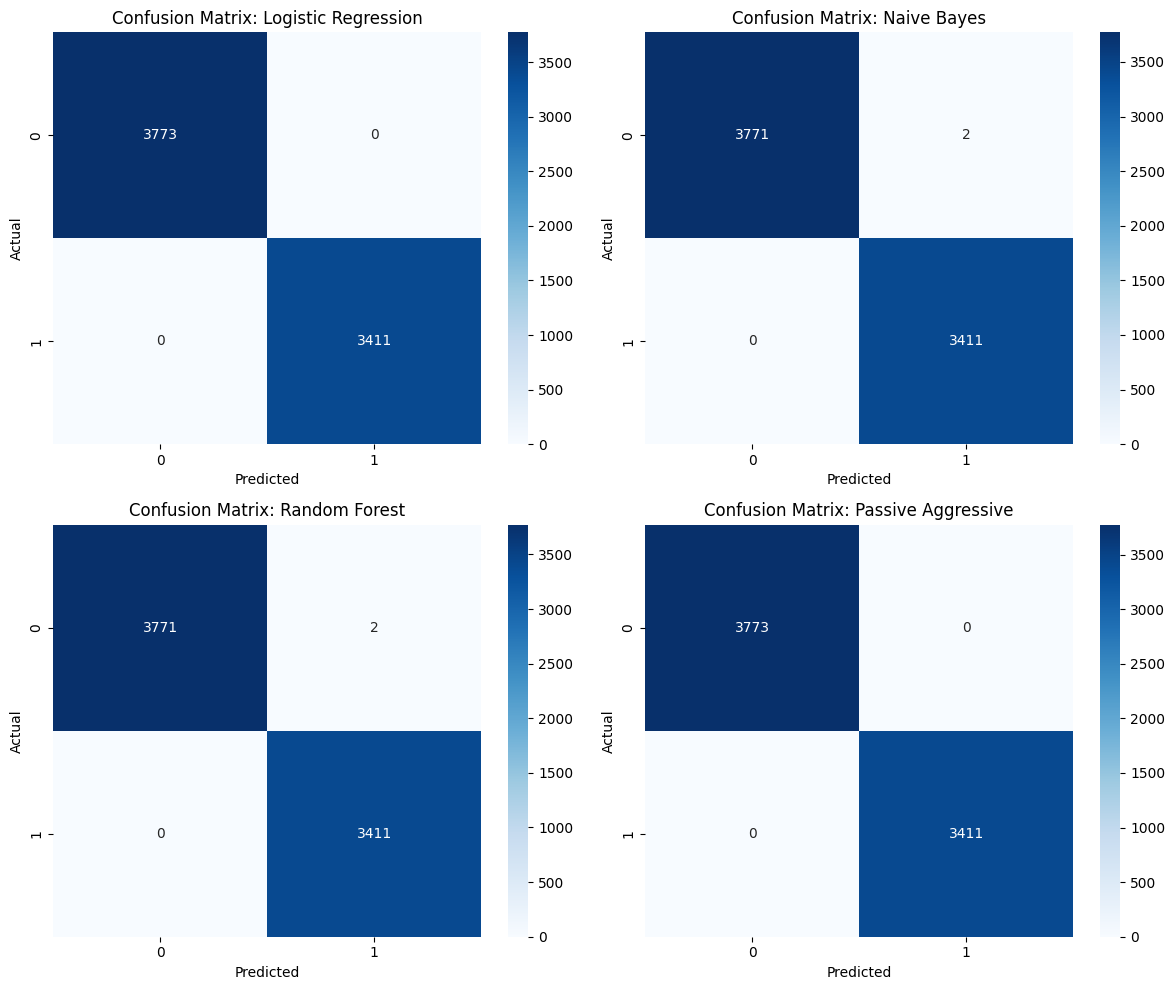

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# EVALUATION FUNCTION
def evaluate(name, model, x_val, y_val, accuracies_dict, preds_dict):
    # print(f"----- Evaluation for {name} -----")
    y_pred = model.predict(x_val)
    acc = accuracy_score(y_val, y_pred)
    # print(f"Accuracy: {acc:.4f}")
    # print("Classification Report:\n", classification_report(y_val, y_pred))
    # print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

    accuracies_dict[name] = acc
    preds_dict[name] = y_pred
    return acc

# STORE ACCURACY + PREDICTIONS
accuracies = {}
model_preds = {}

# Evaluate models
evaluate("Logistic Regression", log_model, x_val, y_val, accuracies, model_preds)
evaluate("Naive Bayes", bayes_model, x_val, y_val, accuracies, model_preds)
evaluate("Random Forest", rf_model, x_val, y_val, accuracies, model_preds)
evaluate("Passive Aggressive", pa_model, x_val, y_val, accuracies, model_preds)

# CONFUSION MATRICES
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (model_name, y_pred) in enumerate(model_preds.items()):
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {model_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [31]:
import joblib

joblib.dump(log_model,"Logistic_model.pkl")

['Logistic_model.pkl']

In [32]:
joblib.dump(pa_model, 'passive_aggressive_model.pkl')

['passive_aggressive_model.pkl']

In [33]:
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [34]:
# Sample 6 mixed articles from the combined dataframe
sample_df = df.sample(6, random_state=42)
sample_df[["title", "text", "subject", "Label"]]

,title,text,subject,Label
22216,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,0
27917,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,0
25007,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,0
1377,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,1
32476,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,0
5766,"As private lawyer, Trump high court pick was f...",WASHINGTON (Reuters) - As a lawyer in private ...,politicsNews,1


In [35]:
# Combine title and text
sample_df["combined_text"] = sample_df["title"] + " - " + sample_df["text"]

# One-hot encode subject
sample_subject_dummies = pd.get_dummies(sample_df["subject"], prefix="subject")

# Match columns to training set and ensure numeric dtype
for col in dummy_subjects.columns:
    if col not in sample_subject_dummies:
        sample_subject_dummies[col] = 0
sample_subject_dummies = sample_subject_dummies[dummy_subjects.columns].astype(int)  # align column order and convert to int

# TF-IDF transform
sample_text_tfidf = tfidf.transform(sample_df["combined_text"])

# Combine TF-IDF and subject one-hot
from scipy.sparse import csr_matrix, hstack
sample_sparse_subject = csr_matrix(sample_subject_dummies.values)
sample_X_final = hstack([sample_text_tfidf, sample_sparse_subject])

In [36]:
models = {
    "Logistic Regression": log_model,
    "Naive Bayes": bayes_model,
    "Random Forest": rf_model,
    "Passive Aggressive": pa_model
}

# Predict and print results
for name, model in models.items():
    predictions = model.predict(sample_X_final)
    print(f"\n{name} Predictions:")
    for i, pred in enumerate(predictions):
        label = "True News" if pred == 1 else "Fake News"
        print(f"{i+1}. {label}")


Logistic Regression Predictions:
1. Fake News
2. Fake News
3. Fake News
4. True News
5. Fake News
6. True News

Naive Bayes Predictions:
1. Fake News
2. Fake News
3. Fake News
4. True News
5. Fake News
6. True News

Random Forest Predictions:
1. Fake News
2. Fake News
3. Fake News
4. Fake News
5. Fake News
6. True News

Passive Aggressive Predictions:
1. Fake News
2. Fake News
3. Fake News
4. True News
5. Fake News
6. True News


In [37]:
print("\nActual Labels:")
for i, label in enumerate(sample_df["Label"].values):
    print(f"{i+1}. {'True News' if label == 1 else 'Fake News'}")


Actual Labels:
1. Fake News
2. Fake News
3. Fake News
4. True News
5. Fake News
6. True News
